In [2]:
import pandas as pd

df=pd.read_csv('Clean_Dataset.csv')

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# How many airlines are there in the dataset

In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

> source cities

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

> Destination city

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
# Because the class is the python keyword

df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

#  Preprocessing 

In [13]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [14]:
df.stops=pd.factorize(df.stops)[0]

In [15]:
df['airline']


0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object

In [16]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [17]:
df=df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city, prefix='destination')).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time',axis=1)


In [18]:
boolean_columns = df.select_dtypes(include='bool').columns

# Create a copy of the DataFrame to add the new columns
df_new = df.copy()

# Convert boolean columns to integers and add as new columns
for col in boolean_columns:
    new_col_name = col + '_int'
    df_new[new_col_name] = df_new[col].astype(int)

print(df_new)

        stops  class  duration  days_left  price  airline_AirAsia  \
0           0      0      2.17          1   5953            False   
1           0      0      2.33          1   5953            False   
2           0      0      2.17          1   5956             True   
3           0      0      2.25          1   5955            False   
4           0      0      2.33          1   5955            False   
...       ...    ...       ...        ...    ...              ...   
300148      1      1     10.08         49  69265            False   
300149      1      1     10.42         49  77105            False   
300150      1      1     13.83         49  79099            False   
300151      1      1     10.00         49  81585            False   
300152      1      1     10.08         49  81585            False   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                   False             False           False              True   
1        

# Training regression model

In [19]:
# pip install scikit-learn

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y=df.drop('price',axis=1),df.price


# Split train and test data

In [21]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [95]:
reg.score(x_test,y_test)

0.9855900546661699

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
Y_pred=reg.predict(x_test)
max_features
print("R2",r2_score(y_test,Y_pred))
print("MAE",mean_absolute_error(y_test,Y_pred))
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",math.sqrt(mean_absolute_error(y_test,Y_pred)))

R2 0.985729916330312
MAE 1058.1674274215598
MSE 7303116.229089302
RMSE 32.52948550809803


Text(0.5, 1.0, 'Prediction Vs Actual price')

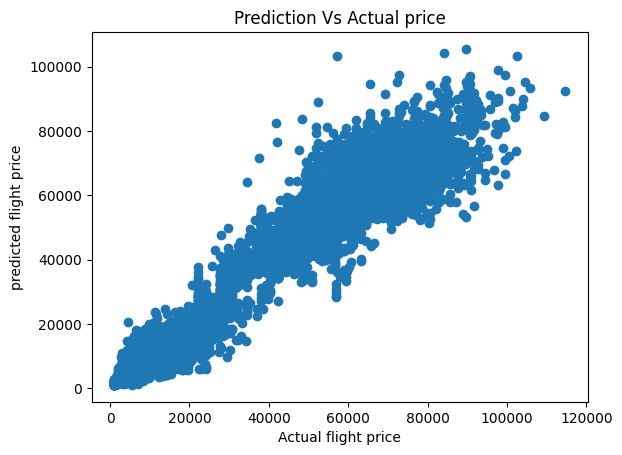

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,Y_pred)
plt.ylabel("predicted flight price")
plt.xlabel("Actual flight price")
plt.title("Prediction Vs Actual price")


In [25]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

# Which kinds of features are the most relevant

In [26]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1],reverse=True)

sorted_importances

[('class', 0.8800441885009272),
 ('duration', 0.05745612275550862),
 ('days_left', 0.018620677666049634),
 ('airline_Vistara', 0.005919660358818134),
 ('airline_Air_India', 0.003998440326459418),
 ('source_Delhi', 0.0035775530069268825),
 ('destination_Delhi', 0.0033394158151855836),
 ('source_Mumbai', 0.00222810214154306),
 ('stops', 0.001939657425515197),
 ('destination_Mumbai', 0.0019262192365717427),
 ('destination_Kolkata', 0.0018059821721488696),
 ('source_Kolkata', 0.0017410903065422777),
 ('arrival_Evening', 0.0015052976745079777),
 ('destination_Hyderabad', 0.0014864763644057365),
 ('destination_Bangalore', 0.001340978442718372),
 ('source_Hyderabad', 0.0013350640110208838),
 ('arrival_Night', 0.00114554221703792),
 ('departure_Evening', 0.0011310134120779622),
 ('source_Bangalore', 0.0011129615387511999),
 ('arrival_Afternoon', 0.0009716556325249556),
 ('source_Chennai', 0.0009079390708155476),
 ('departure_Morning', 0.0008760878289405579),
 ('destination_Chennai', 0.00085242

> from the above sorted feature importrance, class is the most relevant feature.

> The unimportant features are those listed at the last of the list such as, "airline_GO_FIRST", "departure_Late_Night" and "irline_SpiceJet"

# visualize the feature importance by using bar graph

<BarContainer object of 5 artists>

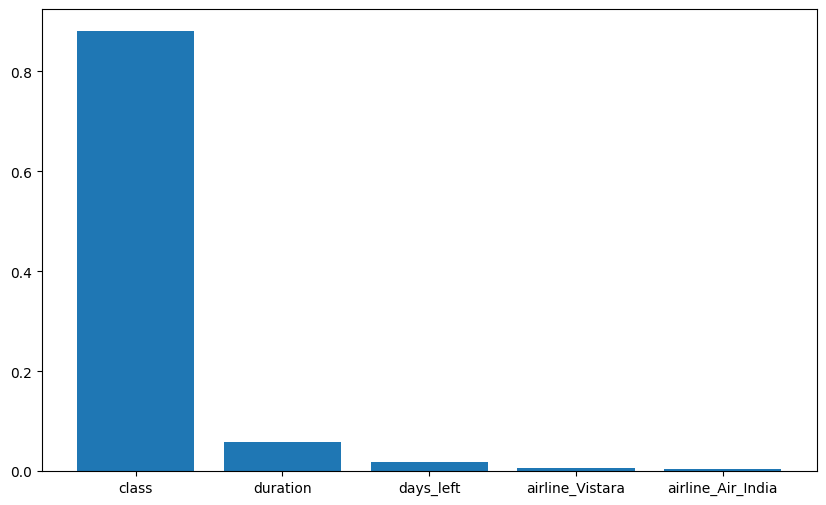

In [27]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

# Hyperparameter tunning  

In [ ]:
from sklearn.model_selection import GridSearchCV

# I have param1: A,B,C
# I have param1: X,Y,Z

# so I have to try the possibilities  AX,AY,AZ,BX,BY,.. 
# if I have to manually tries the possiblities I have to do for all, but now it is done automatically by using hyperparameter tunning algorithms

param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None, 10,20,30],
    'min_samples_split':[2,5,10],
    'min_sample_leaf':[1,2,4],
    'max_features':['auto','sqrt']
    
}

grid_search = GridSearchCV(reg,param_grid, cv=5)

grid_search.fit(X_train,Y_train)

best_params = grid_search.best_params_





In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist={
    
    'n_estimators': randint(100,300),
    'max_depth':[None, 10,20,30, 40,50],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':['auto','sqrt']
    
}

reg=RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist,n_iter=1,cv=2,
                                   scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)
# because of our computer computational resource constrains, we have choose to a small iteration number and cross validation number.
# so the result mey not be a good result.  

random_search.fit(X_train,Y_train)

best_regressor=random_search.best_estimator_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  22.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  23.5s


In [43]:
best_regressor.score(x_test,y_test)

0.9279046003481688

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
Y_pred=best_regressor.predict(x_test)

print("R2",r2_score(y_test,Y_pred))
print("MAE",mean_absolute_error(y_test,Y_pred))
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",math.sqrt(mean_absolute_error(y_test,Y_pred)))

R2 0.9279046003481688
MAE 4228.83635905343
MSE 36896846.25734785
RMSE 65.02950375832057


Text(0.5, 1.0, 'Prediction Vs Actual price')

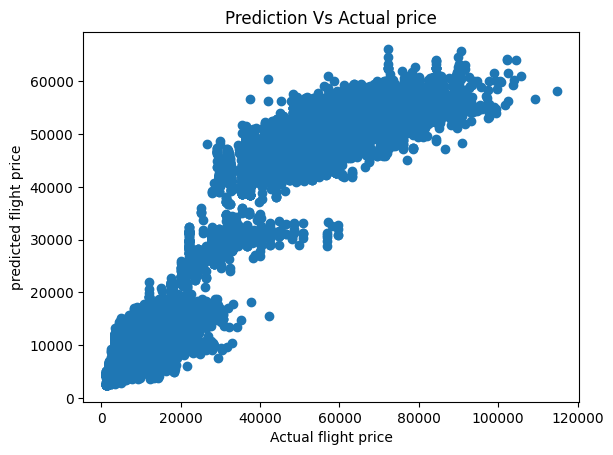

In [45]:
import matplotlib.pyplot as plt
plt.scatter(y_test,Y_pred)
plt.ylabel("predicted flight price")
plt.xlabel("Actual flight price")
plt.title("Prediction Vs Actual price")
